<a href="https://colab.research.google.com/github/mauriziobrt/schaeffer-dataset/blob/main/dataset_riffusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title STEP 0 - Install the required libs
!pip install -U -qq git+https://github.com/huggingface/diffusers.git
!pip install -qq accelerate tensorboard transformers ftfy gradio datasets
!pip install -qq "ipywidgets>=7,<8"
!pip install -qq bitsandbytes

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.0/280.0 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.4/53.4 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 48.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 536.6/536.6 kB 41.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.1/92.1 kB 13.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.7/307.7 kB 37.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.9/75.9 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.0/139.0 kB 18.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 82.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 9.0 MB/s eta 0:00:00
     ━━━━━━

In [ ]:
#@markdown Huggingface login
from huggingface_hub import notebook_login
#from google.colab import userdata
#notebook_login(userdata.get('HF_TOKEN'))
notebook_login()

In [ ]:
# @title STEP 1 - Load Dataset

from datasets import load_dataset, Audio

spec_dataset_name = "dbschaeffer/schaeffer_thesis_spec" # @param {type: "string"}

dataset = load_dataset("dbschaeffer/schaeffer_thesis_spec")
#dataset = dataset.cast_column("audio", Audio(sampling_rate=44100))

Generating train split:   0%|          | 0/682 [00:00<?, ? examples/s]

# STEP 2 - Finetune using LORA

In [ ]:
#@markdown Scarica le dipendenze necessarie
!git clone https://github.com/huggingface/diffusers.git
!pip install -r "/content/diffusers/examples/text_to_image/requirements.txt"
!pip install wandb -qU
!pip install diffusers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.4/196.4 kB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 257.8/257.8 kB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.6 MB/s eta 0:00:00


In [ ]:
#@markdown Log in to your W&B account
import wandb
wandb.login()

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [ ]:
#@markdown Importa dipendenze e carica il modello pre-trained
from diffusers import StableDiffusionPipeline
import torch
from datasets import load_dataset

pipe = StableDiffusionPipeline.from_pretrained("riffusion/riffusion-model-v1", torch_dtype=torch.float16)
#dataset = load_dataset("dbschaeffer/schaeffer_thesis_spec")

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

safety_checker/model.safetensors not found


Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/284 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.84k [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/492M [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.
/usr/local/lib/python3.10/dist-packages/diffusers/pipelines/stable_diffusion/pipeline_stable_diffusion.py:232: FutureWarning: The configuration file of the unet has set the default `sample_size` to smaller than 64 which seems highly unlikely. If your checkpoint is a fine-tuned version of any of the following: 
- CompVis/stable-diffusion-v1-4 
- CompVis/stable-diffusion-v1-3 
- CompVis/stable-diffusion-v1-2 
- CompVis/stable-diffusion-v1-1 
- runwayml/stable-diffusion-v1-5 
- runwayml/stable-diffusion-inpainting 
 you should change 'sample_size' to 64 in the configuration fil

In [ ]:
#@markdown Retrieve latest checkpoint
from huggingface_hub import hf_hub_download
local_folder = "/sddata/finetune/lora/schaeffer/checkpoint-5000"
hf_hub_download(repo_id="mrzbrt/schaeffer-lora", filename="checkpoint-5000/model.safetensors", local_dir=local_folder)
hf_hub_download(repo_id="mrzbrt/schaeffer-lora", filename="checkpoint-5000/optimizer.bin", local_dir=local_folder)
hf_hub_download(repo_id="mrzbrt/schaeffer-lora", filename="checkpoint-5000/pytorch_lora_weights.safetensors", local_dir=local_folder)
hf_hub_download(repo_id="mrzbrt/schaeffer-lora", filename="checkpoint-5000/random_states_0.pkl", local_dir=local_folder)
hf_hub_download(repo_id="mrzbrt/schaeffer-lora", filename="checkpoint-5000/scheduler.bin", local_dir=local_folder)

In [ ]:
!sudo mv "/root/.cache/huggingface/hub/models--mrzbrt--schaeffer-lora/snapshots/1f9f18bfcb56b40f90a6968d695392c54111f056/checkpoint-5000" "/sddata/finetune/lora/schaeffer/checkpoint-5000"

In [ ]:
%%shell

export MODEL_NAME="riffusion/riffusion-model-v1"
export OUTPUT_DIR="/sddata/finetune/lora/schaeffer"
export HUB_MODEL_ID="schaeffer-lora"
export DATASET_NAME="dbschaeffer/schaeffer_thesis_spec"

accelerate launch --mixed_precision="no"  /content/diffusers/examples/text_to_image/train_text_to_image_lora.py \
  --pretrained_model_name_or_path=$MODEL_NAME \
  --dataset_name=$DATASET_NAME \
  --dataloader_num_workers=8 \
  --resolution=512 --center_crop --random_flip\
  --train_batch_size=2 \
  --gradient_accumulation_steps=1 \
  --max_train_steps=2500 \
  --learning_rate=1e-04 \
  --max_grad_norm=1 \
  --lr_scheduler="cosine" --lr_warmup_steps=0 \
  --output_dir=${OUTPUT_DIR} \
  --hub_model_id=${HUB_MODEL_ID} \
  --report_to=wandb \
  --checkpointing_steps=1000 \
  --validation_prompt="Granular sound of a filtered voice, starts with a low bass" \
  --seed=1337 \
  --resume_from_checkpoint "/sddata/finetune/lora/schaeffer/checkpoint-2500"

In [ ]:
from huggingface_hub import HfApi
api = HfApi()

api.upload_folder(
    folder_path="/sddata/finetune/lora/schaeffer/checkpoint-5000",
    repo_id="mrzbrt/schaeffer-lora",
    repo_type="model",
)

In [ ]:
import locale
print(locale.getpreferredencoding())
import locale
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding

ANSI_X3.4-1968


# STEP 3 - Inferenza

In [ ]:
from huggingface_hub import model_info

# LoRA weights ~3 MB
#@markdown Il model path deve esssere uguale a quello che abbiamo trainato prima
model_path = "mrzbrt/schaeffer-lora" #@param {type: "string"}

info = model_info(model_path)
model_base = info.cardData["base_model"]
print(model_base)   # CompVis/stable-diffusion-v1-4

riffusion/riffusion-model-v1


In [ ]:
#@markdown Carichiamo le pipeline per fare l'inferenza
import torch
from diffusers import StableDiffusionPipeline, DPMSolverMultistepScheduler

pipe = StableDiffusionPipeline.from_pretrained(model_base, torch_dtype=torch.float16)
pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors not found


Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

text_encoder/config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/284 [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.84k [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/492M [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/diffusers/models/lora.py:384: FutureWarning: `LoRACompatibleLinear` is deprecated and will be removed in version 1.0.0. Use of `LoRACompatibleLinear` is deprecated. Please switch to PEFT backend by installing PEFT: `pip install peft`.
  deprecate("LoRACompatibleLinear", "1.0.0", deprecation_message)
/usr/local/lib/python3.10/dist-packages/diffusers/models/lora.py:300: FutureWarning: `LoRACompatibleConv` is deprecated and will be removed in version 1.0.0. Use of `LoRACompatibleConv` is deprecated. Please switch to PEFT backend by installing PEFT: `pip install peft`.
  deprecate("LoRACompatibleConv", "1.0.0", deprecation_message)
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be u

In [ ]:
#@markdown Test dell'inferenza
pipe.unet.load_attn_procs(model_path)
pipe.to("cpu")
image = pipe("The sound starts with a distorted synthesizer and ends with a string ensemble", num_inference_steps=100).images[0]
image.save("sound_spec_inharmonic_test.png")

Pipelines loaded with `dtype=torch.float16` cannot run with `cpu` device. It is not recommended to move them to `cpu` as running them will fail. Please make sure to use an accelerator to run the pipeline in inference, due to the lack of support for`float16` operations on this device in PyTorch. Please, remove the `torch_dtype=torch.float16` argument, or use another device for inference.
Pipelines loaded with `dtype=torch.float16` cannot run with `cpu` device. It is not recommended to move them to `cpu` as running them will fail. Please make sure to use an accelerator to run the pipeline in inference, due to the lack of support for`float16` operations on this device in PyTorch. Please, remove the `torch_dtype=torch.float16` argument, or use another device for inference.
Pipelines loaded with `dtype=torch.float16` cannot run with `cpu` device. It is not recommended to move them to `cpu` as running them will fail. Please make sure to use an accelerator to run the pipeline in inference, du

RuntimeError: "LayerNormKernelImpl" not implemented for 'Half'

In [ ]:
#@title Clone repository and install important elements for image to audio
!git clone https://github.com/riffusion/riffusion.git
%pip install argh audiosegment

Cloning into 'riffusion'...
remote: Enumerating objects: 796, done.
remote: Counting objects: 100% (390/390), done.
remote: Compressing objects: 100% (137/137), done.
remote: Total 796 (delta 304), reused 258 (delta 252), pack-reused 406
Receiving objects: 100% (796/796), 8.29 MiB | 21.88 MiB/s, done.
Resolving deltas: 100% (489/489), done.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 797.1 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.2/66.2 kB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for webrtcvad: filename=webrtcvad-2.0.10-cp310-cp310-linux_x86_64.whl size=73463 sha256=e8068c891a7210c7e8114bec4dbd2cd2b2a353d50bd421403cf53c67587027e3
  Stored in directory: /root/.cache/pip/wheels/2a/2b/84/ac7bacfe8c68a87c1ee3dd3c66818a54c71599abf308e8eb35
Successfully built webrtcvad


BEFORE IMPORTING SPECTROGRAM IMAGE CONVERTER DO THE FOLLOWING

1.   CHANGE RIFFUSION POSITION IN ORDER TO ACCESS LIBRARIES INSIDE (RENAME MASTER RIFFUSION TO SOMETHING ELSE AND DRAG THE INNER RIFFUSION OUTSIDE, SO TO HAVE CONTENT/RIFFUSION/SPECTROGRAM_PARAMS.PY)

2.   IN SPECTROGRAM_CONVERTERS, REMOVE SOME PARAMETERS OF INVERSEMEL (LIKE MAX_ITER THEY WILL GIVE AN ERROR, JUST COMMENT THEM OUT

            #max_iter=params.max_mel_iters,
            #tolerance_loss=1e-5,
            #tolerance_change=1e-8,
            #sgdargs=None,)

3.   DO THIS BEFORE IMPORTING!!! ELSE TRY THE RELOAD SCRIPT, BUT IT DOESN'T WORK EVERYTIME

In [ ]:
#@markdown Reload Script
import importlib
list_to_reload = [riffusion.util.audio_util,riffusion.util.torch_util,riffusion.spectrogram_converter,riffusion.util.image_util,riffusion,riffusion.spectrogram_params,riffusion.spectrogram_image_converter]
for el in list_to_reload:
  importlib.reload(el)


In [ ]:
#@markdown Import spectrogram image converter
import riffusion
from riffusion.spectrogram_image_converter import SpectrogramImageConverter
from riffusion.spectrogram_params import SpectrogramParams

param = SpectrogramParams()

spec_img_conv = SpectrogramImageConverter(params= param)

In [ ]:
import PIL.Image
image = PIL.Image.open("/content/media_images_validation_29304_c3858381404d82e547a0.png")

In [ ]:
 #@markdown Prova a riprodurre il file audio ottenuto
test = spec_img_conv.audio_from_spectrogram_image(image = image)
test

# IF Dataset Of Spectrograms + Caption is not there then Dataset Pre-processing

I parametri devono essere: sample rate a 44100, numero di mel 512 (min 0, max 10000), fft a step size 10, window duration 100 e padded duration 400.
griffin lim max iters a 32, power for image = 0.25

test usare cli.py di riffusion per convertire lo spettro in immagine

ATTENTION:

1.   CHANGE RIFFUSION POSITION IN ORDER TO ACCESS LIBRARIES INSIDE (RENAME MASTER RIFFUSION TO SOMETHING AND DRAG THE INNER RIFFUSION OUTSIDE, SO TO HAVE CONTENT/RIFFUSION/SPECTROGRAM_PARAMS.PY)

2.   IN SPECTROGRAM_CONVERTERS, REMOVE SOME PARAMETERS OF INVERSEMEL (THEY WILL GIVE AN ERROR, JUST COMMENT THEM OUT)

3.   DO THIS BEFORE IMPORTING!!! ELSE TRY THE RELOAD SCRIPT, BUT IT DOESN'T WORK EVERYTIME

In [ ]:
#@title STEP 2 - Clone repository and install important elements
!git clone https://github.com/riffusion/riffusion.git
%pip install argh audiosegment

Cloning into 'riffusion'...
remote: Enumerating objects: 796, done.
remote: Counting objects: 100% (390/390), done.
remote: Compressing objects: 100% (137/137), done.
remote: Total 796 (delta 304), reused 258 (delta 252), pack-reused 406
Receiving objects: 100% (796/796), 8.29 MiB | 9.24 MiB/s, done.
Resolving deltas: 100% (489/489), done.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.2/66.2 kB 6.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for webrtcvad: filename=webrtcvad-2.0.10-cp310-cp310-linux_x86_64.whl size=73462 sha256=6b20c616c75d11766deb8d17170b17f8705bc9b38d4382e3d42030ff9378ea7b
  Stored in directory: /root/.cache/pip/wheels/2a/2b/84/ac7bacfe8c68a87c1ee3dd3c66818a54c71599abf308e8eb35
Successfully built webrtcvad


In [ ]:
#@title STEP 3 - Import libraries
import pydub
import importlib
from riffusion.spectrogram_params import SpectrogramParams
from riffusion.spectrogram_converter import SpectrogramConverter
from riffusion.spectrogram_image_converter import SpectrogramImageConverter

In [ ]:
SpectrogramConverter(params= param)

In [ ]:
import sys
for key in sys.modules.keys():
  print(key)

In [ ]:
list_to_reload = [riffusion.util.audio_util,riffusion.util.torch_util,riffusion.spectrogram_converter,riffusion.util.image_util,riffusion,riffusion.spectrogram_params,riffusion.spectrogram_image_converter]
for el in list_to_reload:
  importlib.reload(el)

In [ ]:
param = SpectrogramParams()
spec_conv = SpectrogramConverter(params = param)
spec_img_conv = SpectrogramImageConverter(params= param)

<ipython-input-5-42307628d3ca>:2: UserWarning: WARNING: cuda is not available, using cpu instead.
  spec_conv = SpectrogramConverter(params = param)
/content/riffusion/spectrogram_image_converter.py:21: UserWarning: WARNING: cuda is not available, using cpu instead.
  self.converter = SpectrogramConverter(params=params, device=device)


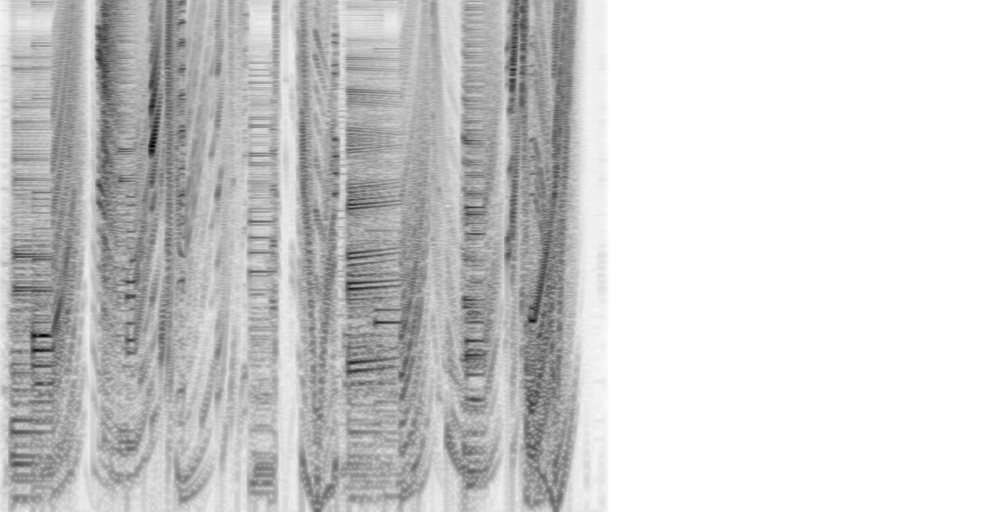

In [ ]:
#Convert dataset file to pydub for spectrogram conversion
import audiosegment
from pydub import  effects
import numpy as np

file_number = 100

pre_conversion_audio = dataset["train"][file_number]["audio"]["array"]
sr = dataset["train"][file_number]["audio"]["sampling_rate"]

a_pre_conversion_audio = pre_conversion_audio.copy()
a_pre_conversion_audio.resize(441000)

#testing_file_conversion = a_pre_conversion_audio.astype("float32", order='C')
my_data = (a_pre_conversion_audio * 2147483647).astype(np.int32)
te = audiosegment.from_numpy_array(my_data, sr)
normalizedsound = effects.normalize(te)
array_new = normalizedsound.get_array_of_samples()

spec_img_conv.spectrogram_image_from_audio(normalizedsound)

In [ ]:
columns = dataset["train"].column_names

def audio_to_spec(example):
  audio_arr = np.array(example["audio"]["array"])
  audio_sr = example["audio"]["sampling_rate"]
  audio_arr.resize(441000)
  array_for_pydub = (audio_arr * 2147483647).astype(np.int32)
  pydub_from_array = audiosegment.from_numpy_array(array_for_pydub, sr)
  normalizedsound = effects.normalize(pydub_from_array)
  example["image"] = spec_img_conv.spectrogram_image_from_audio(normalizedsound)
  example["text"] = example["description"]
  return example

data_spec = dataset.map(audio_to_spec, remove_columns=columns)

/usr/local/lib/python3.10/dist-packages/dill/_dill.py:412: PicklingWarning: Cannot locate reference to <enum 'ExifTags'>.
  StockPickler.save(self, obj, save_persistent_id)
/usr/local/lib/python3.10/dist-packages/dill/_dill.py:412: PicklingWarning: Cannot pickle <enum 'ExifTags'>: riffusion.spectrogram_params.SpectrogramParams.ExifTags has recursive self-references that trigger a RecursionError.
  StockPickler.save(self, obj, save_persistent_id)
Parameter 'function'=<function audio_to_spec at 0x79927b61b640> of the transform datasets.arrow_dataset.Dataset._map_single couldn't be hashed properly, a random hash was used instead. Make sure your transforms and parameters are serializable with pickle or dill for the dataset fingerprinting and caching to work. If you reuse this transform, the caching mechanism will consider it to be different from the previous calls and recompute everything. This warning is only showed once. Subsequent hashing failures won't be showed.


Map:   0%|          | 0/682 [00:00<?, ? examples/s]

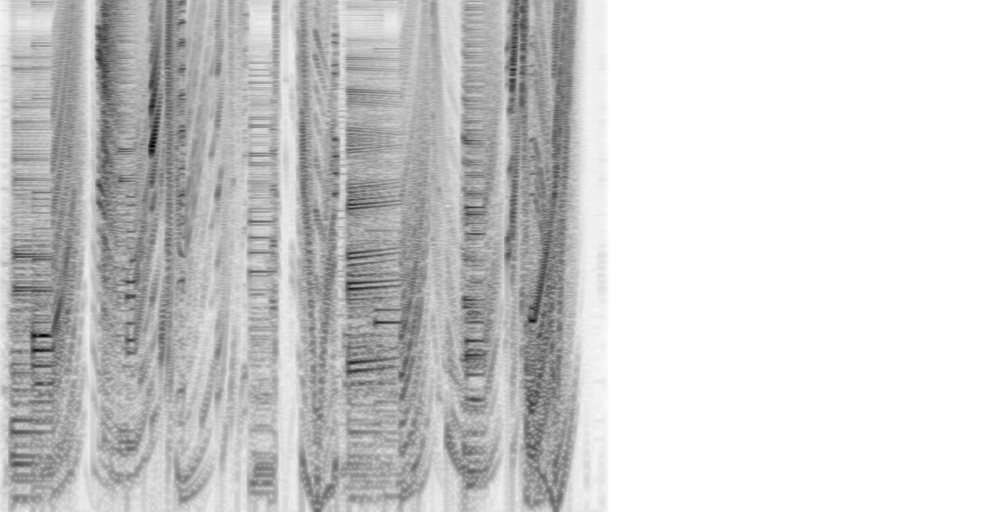

In [ ]:
data_spec["train"][100]["image"]

In [ ]:
data_spec.push_to_hub("dbschaeffer/schaeffer_thesis_spec", private=True)

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/682 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/7 [00:00<?, ?ba/s]

CommitInfo(commit_url='https://huggingface.co/datasets/dbschaeffer/schaeffer_thesis_spec/commit/8af9cfcaf2a12fcfdd2f44253c513815accb566b', commit_message='Upload dataset', commit_description='', oid='8af9cfcaf2a12fcfdd2f44253c513815accb566b', pr_url=None, pr_revision=None, pr_num=None)

In [ ]:
test = spec_img_conv.audio_from_spectrogram_image(image = data_spec["train"][100]["image"])

NameError: name 'data_spec' is not defined

In [ ]:
%mkdir audios

In [ ]:
image_sound

'/content/media_images_validation_48_36abea0d38366056545c.png'

In [ ]:
import os
import PIL.Image

path = "/content/audios"
dirs = os.listdir(path)
for files in dirs:
  #print(files)
  path_file = path + "/" + files
  image_sound =  PIL.Image.open(path_file)
  #print(path_file)
  test1 = spec_img_conv.audio_from_spectrogram_image(image = image_sound)
  audio_name = path_file + ".wav"
  test1.export(audio_name, format="wav")

In [ ]:
normalizedsound

: 1 channels, 32 bit, sampled @ 44.1 kHz, 10.000s long